In [50]:
from laplace import Laplace

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import numpy as np

import json

import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(43)
torch.set_printoptions(sci_mode=False)

## Import data and network

In [4]:
import torch
import pandas as pd

In [10]:
X_df = pd.read_csv('X.csv')
Y_df = pd.read_csv('Y.csv')

In [27]:
x = torch.from_numpy(X_df.to_numpy()).to(torch.float32)
y = torch.from_numpy(Y_df.to_numpy()).to(torch.float32)

In [28]:
# Shape of the model
in_dim = 2
h_dim = 32
out_dim = 1
model = nn.Sequential(
    nn.Linear(in_dim, h_dim),
    nn.Sigmoid(),
    nn.Linear(h_dim, out_dim)
)

# Read nn weights from file
with open('nn.json') as fin:
    nn_json_str = fin.read()
    nn_json = json.loads(nn_json_str)
    
assert len(model.state_dict()) == 2 * len(nn_json)
iter_states = iter(model.state_dict())

for layer_json in nn_json:
    state_w = next(iter_states)
    state_b = next(iter_states)
    tensor_w = torch.tensor(layer_json['weight']).T
    tensor_b = torch.tensor(layer_json['bias']).T
    model.state_dict()[state_w].data.copy_(tensor_w)
    model.state_dict()[state_b].data.copy_(tensor_b)
    
ps = [model.state_dict()[layer].data for layer in model.state_dict()]
for p in ps:
    print(p.shape)

torch.Size([32, 2])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


In [29]:
# y_hat = torch.argmax(torch.softmax(model.forward(x), dim=1), dim=1) + 1

In [40]:
yhat = torch.special.expit(model(x))

In [48]:
print(all(torch.round(yhat) == y))
all(torch.round(yhat[1000:]) == y[1000:])

False


True

## Compute exact Hessian (sancheck)

In [ ]:
# too hard :/

## Compute emp. Fisher

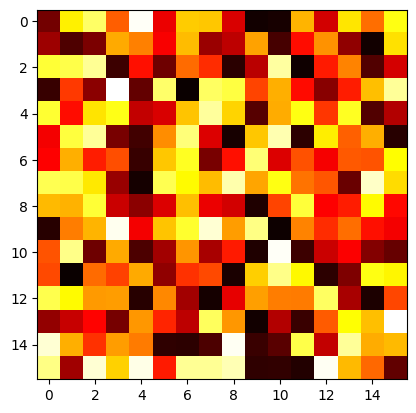

In [51]:
a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [58]:
def colplot(H):
    plt.imshow(H, cmap='seismic', interpolation='nearest')
    plt.show()

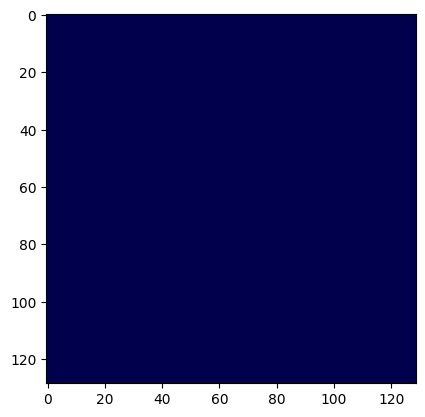

In [81]:
colplot(la.H)

In [63]:
la.H

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [79]:
%%capture
la = Laplace(model, 'classification',
             subset_of_weights='all',
             hessian_structure='full',
             backend=AsdlEF)

la.fit(DataLoader(TensorDataset(x, y), batch_size=1))

In [80]:
la.H

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
from laplace.curvature.asdl import AsdlEF

laplace.curvature.asdl.AsdlEF

In [62]:
x, y

(tensor([[ 2.8030,  3.2438],
         [ 1.1935,  2.3909],
         [ 4.2797,  4.7876],
         ...,
         [-1.1883,  2.1863],
         [-2.0793,  3.3348],
         [-3.2632,  4.9258]]),
 tensor([[1.],
         [1.],
         [1.],
         ...,
         [0.],
         [0.],
         [0.]]))

## Compute KFAC Fisher